In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure
from PIL import Image
%matplotlib inline

#### Reading in images

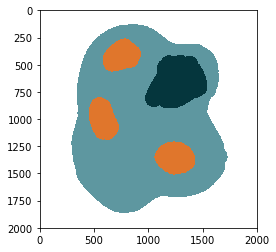

In [66]:
blob = cv2.imread('blob1.jpg')
blob = cv2.cvtColor(test, cv2.COLOR_BGR2RGB) # cv2 default reads in images as BGR 
                                             # so need to convert to conventional RGB
plt.imshow(test)

#### Edge Detection
1. Extract the outer edge of the large light blue bolb as a vector path
2. Extract the edges of each of the smaller inner blobs as separate vector paths

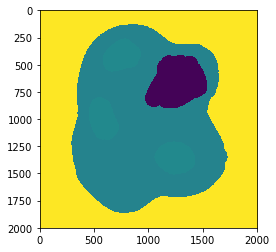

In [67]:
# In order to use find contours with scikit-image, need to get rid of image colors first
blob = cv2.imread('blob1.jpg')
blob = cv2.cvtColor(blob, cv2.COLOR_BGR2GRAY)
plt.imshow(blob) # not sure why the colors come out so weird

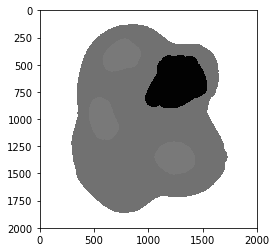

In [42]:
blob = cv2.imread('blob1.jpg')
blob = cv2.cvtColor(blob, cv2.COLOR_BGR2GRAY)
plt.imshow(blob, cmap=plt.cm.gray) # need to specifically set cmap for colors to actually look grey scale

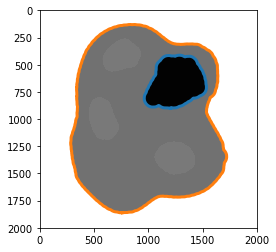

In [88]:
# Finding contours and plotting them out on original image
con_small = measure.find_contours(blob, 50)
con_big = measure.find_contours(blob, 200)

fig, ax = plt.subplots()
ax.imshow(blob, cmap=plt.cm.gray)

for n, contour in enumerate(con_small):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

for n, contour in enumerate(con_big):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
    
# somehow can't find the other small ones

#### Calculating Distance
How far away is the centroid of each inner blob from the nearest edge of the large blub bubble?

In [112]:
# moments
M = measure.moments(blob)
print(M)

[[7.71035072e+08 7.72432148e+11 1.08222099e+15 1.70098600e+18]
 [7.76052668e+11 7.79144223e+14 1.09002190e+18 1.70945206e+21]
 [1.07467768e+15 1.08088573e+18 1.50253575e+21 2.34061595e+24]
 [1.66790814e+18 1.67896101e+21 2.32112436e+24 3.59569053e+27]]


In [176]:
blob

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [177]:
con_big

[array([[1861.        ,  758.54545455],
        [1860.54166667,  759.        ],
        [1860.53781513,  760.        ],
        ...,
        [1861.54237288,  757.        ],
        [1861.55      ,  758.        ],
        [1861.        ,  758.54545455]])]

1006.5076111401584
1001.8119492585157


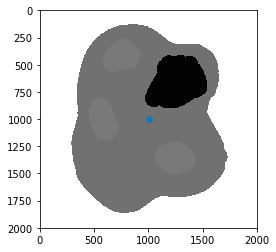

In [115]:
# center coordinates
cr = M[1, 0] / M[0, 0]
cc = M[0, 1] / M[0, 0]
print(cr)
print(cc)

fig, ax = plt.subplots()
ax.imshow(blob, cmap=plt.cm.gray)
plt.scatter(cr, cc)

In [123]:
con_big

[array([[1861.        ,  758.54545455],
        [1860.54166667,  759.        ],
        [1860.53781513,  760.        ],
        ...,
        [1861.54237288,  757.        ],
        [1861.55      ,  758.        ],
        [1861.        ,  758.54545455]])]

In [117]:
measure.moments_central(blob)

array([[ 7.71035072e+08,  3.05175781e-05,  3.08389234e+14,
        -1.09196335e+15],
       [ 2.95996666e-04,  1.68538636e+12, -2.61864029e+15,
         1.92365576e+17],
       [ 2.93574765e+14,  8.68077922e+14,  1.08278313e+20,
        -5.51015440e+20],
       [-4.73359791e+15,  2.87343287e+17, -2.36356263e+21,
         5.44021735e+22]])

In [95]:
image = np.zeros((20, 20), dtype=np.double)
image[13:17, 13:17] = 1
M = measure.moments(image)
cr = M[1, 0] / M[0, 0]
cc = M[0, 1] / M[0, 0]
measure.moments_central(image, (cr, cc))


array([[16.,  0., 20.,  0.],
       [ 0.,  0.,  0.,  0.],
       [20.,  0., 25.,  0.],
       [ 0.,  0.,  0.,  0.]])

#### Smoothing Paths
Extract the vector outline and smooth the path

#### Concentric Circles
Use the voctor shape of one of the blobs and create 10 concentric circles that radiate inwards the center

#### Area
How much area is covered by the orange?

In [217]:
# A way using opencv, but I'm not completely sure what's going on..
img = cv2.imread('blob1.jpg', 0)
ret,thresh= cv2.threshold(img, 127, 255, 0) # don't know what the numbers mean
contours, hierarcy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
cv2.contourArea(cnt)

207530.5

In [223]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = M['m00']
print(cx, cy)
print(area)

1252 664
207530.5


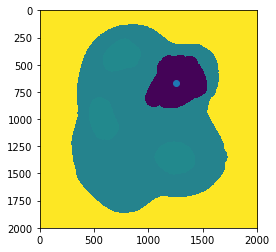

In [219]:
plt.imshow(img)
plt.scatter(cx, cy)